# Q.5 - Support Vector Regression 

Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Load Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [3]:
df= pd.read_csv('F:/python/Data 2.csv')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
X = df.drop('PE',axis=1)
y = df['PE']

print('Shape of X = ',X.shape)
print('Shape of y = ',y.shape)

Shape of X =  (9568, 4)
Shape of y =  (9568,)


## Split Data

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)
print('Shape of X_train = ',X_train.shape)
print('Shape of y_train = ',y_train.shape)
print('Shape of X_test= ',X_test.shape)
print('Shape of y_test = ',y_test.shape)

Shape of X_train =  (7654, 4)
Shape of y_train =  (7654,)
Shape of X_test=  (1914, 4)
Shape of y_test =  (1914,)


# Support Vector Regression - ML Model Training

In [7]:
from sklearn.svm import SVR

In [8]:
svr_rbf = SVR(kernel= 'linear')
svr_rbf.fit(X_train,y_train)

SVR(kernel='linear')

# R square for given algo

In [9]:
svr_rbf.score(X_test,y_test)

0.9308539161754928

In [10]:
y_pred = svr_rbf.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y_test,y_pred)

0.9308539161754928

Text(0.5, 1.0, 'Actual vs. Predicted')

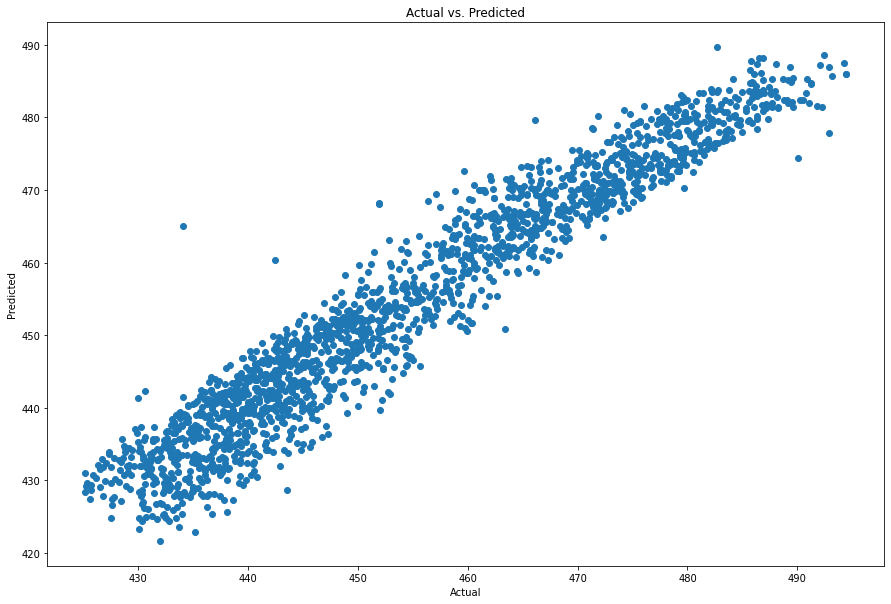

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Predict the value of PE

In [14]:
X_test.iloc[-1,:]

AT      23.50
V       59.21
AP    1018.29
RH      63.00
Name: 926, dtype: float64

In [15]:
svr_rbf.predict([X_test.iloc[-1,:]])

array([447.16808778])

In [16]:
y_test.iloc[-1]

443.31

In [17]:
pred = svr_rbf.predict(X_test)
pred

array([431.9902397 , 481.51734498, 470.95203814, ..., 450.85220713,
       457.76813945, 447.16808778])

In [18]:
y_test

7683    430.29
3763    484.45
9521    472.16
7691    434.99
9205    432.99
         ...  
5742    453.28
3372    478.27
4248    443.48
4867    458.62
926     443.31
Name: PE, Length: 1914, dtype: float64

In [19]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
7683,430.29,431.990240,-1.700240
3763,484.45,481.517345,2.932655
9521,472.16,470.952038,1.207962
7691,434.99,428.511153,6.478847
9205,432.99,431.019732,1.970268
6310,465.61,467.133837,-1.523837
3167,477.50,473.586444,3.913556
3617,449.80,445.608563,4.191437
3244,476.89,474.434956,2.455044
6316,451.47,443.033345,8.436655


# Mean_Squared_error

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

mse,rmse

(19.897136503699112, 4.460620641087865)